# Assignment 2
In this image classification implementation, we read Cifar10 dataset with pytorch, then build and train a CNN network model , and finally calculate the accuracy on test dataset.


In [27]:
# Libraries

import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torchvision


## Download dataset

In [28]:
training_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
)

In [29]:
test_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
)

Label: 9


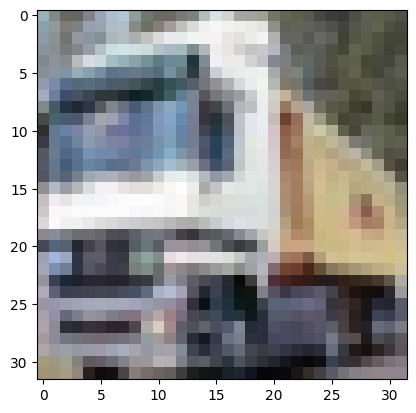

In [30]:
image, label = training_data[1]
plt.imshow(image)
print('Label:', label)


## convert to tensor

In [31]:
from torchvision.transforms import ToTensor

In [32]:
training_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    transform=ToTensor()
)

In [33]:
test_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    transform=ToTensor()
)

In [34]:
batch_size = 64

# Create Data Loaders
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [35]:
for image, labels in train_dataloader:
    print(labels.shape)
    print(image.shape)
    break

torch.Size([64])
torch.Size([64, 3, 32, 32])


## Vizualize batch image

In [36]:
classes = ("planes", "car", "bird", 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

dog   cat   planes dog   frog  dog   frog  bird  truck planes planes deer  bird  frog  frog  cat   car   frog  frog  horse bird  ship  frog  planes frog  ship  planes truck bird  frog  planes deer  truck horse cat   car   dog   car   ship  cat   frog  truck car   truck bird  bird  cat   planes dog   bird  planes truck deer  frog  ship  deer  dog   frog  frog  car   car   car   deer  cat  


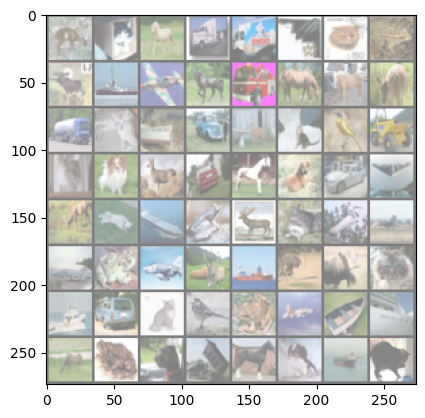

In [37]:
import numpy as np

# function to show img

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show

# get random training images
dataiter= iter(train_dataloader)
images, labels = next(dataiter)

#show miages
imshow(torchvision.utils.make_grid(image))

#print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(64)))

## build cnn

In [38]:
import torch.nn as nn
import torch.nn.functional as F

# Define model

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [41]:
import torch.optim as optim
import torch.nn as nn

#criterion = nn.HingeEmbeddingLoss()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Training the model

In [43]:
for epoch in range (20):

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get input, data is list of [inouts, labels]
        inputs, labels = data
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # stats
        running_loss += loss.item() # item() converts loss value to std python num
    print(f'epoch: {epoch}', f' number of img: {i}', 'loss: ', running_loss)

print('Finished training')

epoch: 0  number of img: 781 loss:  973.5788243412971
epoch: 1  number of img: 781 loss:  957.5685749650002
epoch: 2  number of img: 781 loss:  941.5936893224716
epoch: 3  number of img: 781 loss:  921.4969740509987
epoch: 4  number of img: 781 loss:  909.1573486924171
epoch: 5  number of img: 781 loss:  893.9581642150879
epoch: 6  number of img: 781 loss:  881.4884385466576
epoch: 7  number of img: 781 loss:  863.8544704318047
epoch: 8  number of img: 781 loss:  852.410589993
epoch: 9  number of img: 781 loss:  844.7084886431694
epoch: 10  number of img: 781 loss:  830.7208405137062
epoch: 11  number of img: 781 loss:  816.2668125033379
epoch: 12  number of img: 781 loss:  805.5483422279358
epoch: 13  number of img: 781 loss:  792.7828333973885
epoch: 14  number of img: 781 loss:  782.7271522283554
epoch: 15  number of img: 781 loss:  772.3208380937576
epoch: 16  number of img: 781 loss:  763.9701865911484
epoch: 17  number of img: 781 loss:  756.1734842061996
epoch: 18  number of img

In [44]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        # calc output by rinning img through network
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0) 
        correct += (predicted == labels).sum().item()


print(f'Accuracy of the network on the 10000 test images i: {100*correct // total}% ')

Accuracy of the network on the 10000 test images i: 61% 


In [45]:
torch.save(net.state_dict(), 'model.pth')
print("Saved to model.pth")

Saved to model.pth
